# import lib

In [162]:
import pandas
import psycopg2
import configparser

# connect to db

In [163]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [164]:
cur=conn.cursor()

# q1

In [165]:
sql_q1 = """
            select * from gp19.student """

In [166]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,abc@dukes.jmu.edu,brooke harmison,IA
1,harmisbt@jmu.edu,marissa james,IA
2,james2mr@jmu.edu,elena dinman,IA
3,dinmaner@jmu.edu,karlyn barron,IA


# q2

In [167]:
sql_q2 = """
            select gp19.professor.p_name, 
            gp19.course.s_name
            from gp19.professor
            inner join gp19.course
            on gp19.professor.p_email = gp19.course.p_email
            
            """

In [168]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,s_name
0,prof wei,data mining
1,prof marrin,ia
2,prof moore,national security
3,prof rittenhouse,tech apps
4,prof rittenhouse,GIS Mapping


## q3

In [169]:
sql_q3 = """
            select c_number, 
            count(c_number) as enrolled
            from gp19.enroll_list
            group by c_number
            order by enrolled desc            
            """

<AxesSubplot:xlabel='c_number'>

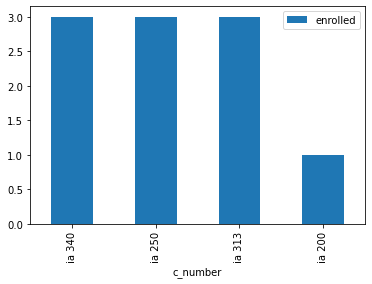

In [170]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [171]:
sql_q4 = """
        select gp19.professor.p_name, 
        count(gp19.course.s_name) as teaching_number
        from gp19.professor
        inner join gp19.course
        on gp19.professor.p_email = gp19.course.p_email
        group by professor.p_name
        order by teaching_number desc
            """

<AxesSubplot:xlabel='p_name'>

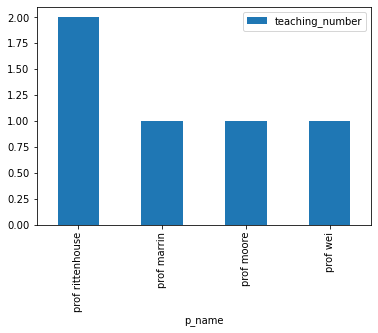

In [172]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [178]:
sql_q5_professor = """
                    insert into gp19.professor(p_email,p_name,p_office)
                    values('{}','{}','{}')
                    """.format('ia_newww','new_c_name','online','new_p@jmu.edu')

In [179]:
cur.execute(sql_q5_professor)

In [180]:
conn.commit()

In [181]:
df= pandas.read_sql_query('select * from gp19.course',conn)
df[:]

,c_number,s_name,p_email,room_number
0,ia 250,national security,grkjf@jmu.edu,engeo 2010
1,ia 313,data mining,weixx@jmu.edu,engeo 1230
2,ia 340,ia,marrin@jmu.edu,isa 140
3,GS 260,GIS Mapping,rittensp@jmu.edu,engeo 1130
4,ia 200,tech apps,rittensp@jmu.edu,engeo 1302


## q6

In [182]:
sql_q6_course = """
                update gp19.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('marrin@jmu.edu','weixx@jmu.edu')

In [183]:
cur.execute(sql_q6_course)

In [185]:
#cur.execute('ROLLBACK')

In [187]:
conn.commit()

In [188]:
df=pandas.read_sql_query('select * from gp19.course',conn)
df[:]

,c_number,s_name,p_email,room_number
0,ia 250,national security,grkjf@jmu.edu,engeo 2010
1,ia 340,ia,marrin@jmu.edu,isa 140
2,GS 260,GIS Mapping,rittensp@jmu.edu,engeo 1130
3,ia 200,tech apps,rittensp@jmu.edu,engeo 1302
4,ia 313,data mining,marrin@jmu.edu,engeo 1230


In [189]:
sql_q6_professor = """
                    delete from gp19.professor
                    where p_email = '{}'
                    """.format('weixx@jmu.,edu')

In [190]:
cur.execute(sql_q6_professor)

In [191]:
conn.commit()

In [192]:
df=pandas.read_sql_query('select * from gp19.professor',conn)
df[:]

,p_email,p_name,p_office
0,weixx@jmu.edu,prof wei,engeo 1234
1,marrin@jmu.edu,prof marrin,engeo 3456
2,grkjf@jmu.edu,prof moore,isat 3450
3,new_p_e,new_p_n,new_p_o
4,rittensp@jmu.edu,prof rittenhouse,engeo 1130
5,ia_new,new_c_name,online
6,ia_neww,new_c_name,online
7,ia_newww,new_c_name,online


## close connection

In [193]:
cur.close()
conn.close()